In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
import tensorflow as tf

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

Load the dataset

In [2]:
df = loadtxt('data_oversampled.csv',skiprows = 1, delimiter=',')

Splitting the dataset

In [3]:
# split into input (X) and output (y) variables
x = df[:,0:4]
y = df[:,4]

Standardisation

In [4]:
#Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)

In [6]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256-164-8)
# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(164, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, 
                    batch_size=8, #Batch Size = 8
                    verbose=1, 
                    validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
83/83 [==============================] - 2s 6ms/step - loss: 0.6952 - accuracy: 0.6398 - val_loss: 0.6432 - val_accuracy: 0.6364
Epoch 2/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.6915 - val_loss: 0.6189 - val_accuracy: 0.6545
Epoch 3/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5998 - accuracy: 0.7249 - val_loss: 0.5771 - val_accuracy: 0.7045
Epoch 4/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7158 - val_loss: 0.5480 - val_accuracy: 0.7182
Epoch 5/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7143 - val_loss: 0.5249 - val_accuracy: 0.7273
Epoch 6/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.7173 - val_loss: 0.5115 - val_accuracy: 0.7455
Epoch 7/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5486 - accuracy: 0.7356 - val_loss: 0.4903 - val_accuracy: 0.7682
Epoch 8/300
8

Epoch 59/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7842 - val_loss: 0.4613 - val_accuracy: 0.7682
Epoch 60/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7857 - val_loss: 0.4651 - val_accuracy: 0.7636
Epoch 61/300
83/83 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7979 - val_loss: 0.4563 - val_accuracy: 0.7682
Epoch 62/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.7690 - val_loss: 0.4539 - val_accuracy: 0.7818
Epoch 63/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.7918 - val_loss: 0.4447 - val_accuracy: 0.7864
Epoch 64/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.7812 - val_loss: 0.4508 - val_accuracy: 0.7818
Epoch 65/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7918 - val_loss: 0.4613 - val_accuracy: 0.7591
Epoch 

83/83 [==============================] - 0s 3ms/step - loss: 0.5104 - accuracy: 0.7720 - val_loss: 0.4438 - val_accuracy: 0.7818
Epoch 174/300
83/83 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7720 - val_loss: 0.4469 - val_accuracy: 0.7864
Epoch 175/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.7918 - val_loss: 0.4534 - val_accuracy: 0.7727
Epoch 176/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4468 - accuracy: 0.8055 - val_loss: 0.4461 - val_accuracy: 0.7864
Epoch 177/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.7903 - val_loss: 0.4498 - val_accuracy: 0.7727
Epoch 178/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8191 - val_loss: 0.4472 - val_accuracy: 0.7955
Epoch 179/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.7903 - val_loss: 0.4407 - val_accuracy: 0.7909
Epoch 180/300

83/83 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8116 - val_loss: 0.4490 - val_accuracy: 0.7864
Epoch 288/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.8176 - val_loss: 0.4429 - val_accuracy: 0.8000
Epoch 289/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.8207 - val_loss: 0.4448 - val_accuracy: 0.8045
Epoch 290/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.8009 - val_loss: 0.4397 - val_accuracy: 0.8000
Epoch 291/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.8040 - val_loss: 0.4436 - val_accuracy: 0.7955
Epoch 292/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7994 - val_loss: 0.4443 - val_accuracy: 0.7909
Epoch 293/300
83/83 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8146 - val_loss: 0.4444 - val_accuracy: 0.8045
Epoch 294/300

In [7]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8693
Training Accuracy: 86.93
7/7 [==============================] - 0s 1ms/step - loss: 0.4567 - accuracy: 0.7955
Validation Accuracy: 79.55


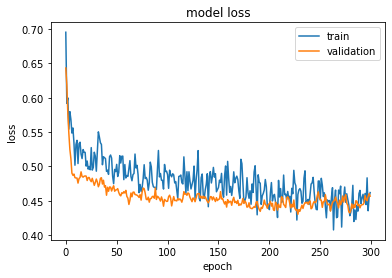

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [30]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256-164-8)

# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(164, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, 
                    batch_size=16, #Batch Size = 16
                    verbose=1, 
                    validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
42/42 [==============================] - 2s 8ms/step - loss: 0.7247 - accuracy: 0.6231 - val_loss: 0.6482 - val_accuracy: 0.6409
Epoch 2/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5935 - accuracy: 0.7234 - val_loss: 0.6356 - val_accuracy: 0.6318
Epoch 3/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7416 - val_loss: 0.6204 - val_accuracy: 0.6455
Epoch 4/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7325 - val_loss: 0.6027 - val_accuracy: 0.7000
Epoch 5/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.7325 - val_loss: 0.5878 - val_accuracy: 0.6864
Epoch 6/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7204 - val_loss: 0.5729 - val_accuracy: 0.7227
Epoch 7/300
42/42 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7416 - val_loss: 0.5542 - val_accuracy: 0.7409
Epoch 8/300
4

Epoch 59/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 0.8040 - val_loss: 0.4602 - val_accuracy: 0.7727
Epoch 60/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.8055 - val_loss: 0.4616 - val_accuracy: 0.7636
Epoch 61/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8191 - val_loss: 0.4644 - val_accuracy: 0.7500
Epoch 62/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7888 - val_loss: 0.4626 - val_accuracy: 0.7727
Epoch 63/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.8024 - val_loss: 0.4649 - val_accuracy: 0.7636
Epoch 64/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4437 - accuracy: 0.8131 - val_loss: 0.4584 - val_accuracy: 0.7545
Epoch 65/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4600 - accuracy: 0.7903 - val_loss: 0.4645 - val_accuracy: 0.7682
Epoch 

42/42 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8070 - val_loss: 0.4360 - val_accuracy: 0.7818
Epoch 174/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.8176 - val_loss: 0.4334 - val_accuracy: 0.7727
Epoch 175/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8161 - val_loss: 0.4344 - val_accuracy: 0.7773
Epoch 176/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8298 - val_loss: 0.4373 - val_accuracy: 0.7591
Epoch 177/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.8100 - val_loss: 0.4343 - val_accuracy: 0.7773
Epoch 178/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4176 - accuracy: 0.8146 - val_loss: 0.4381 - val_accuracy: 0.7864
Epoch 179/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8055 - val_loss: 0.4496 - val_accuracy: 0.7636
Epoch 180/300

42/42 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8161 - val_loss: 0.4275 - val_accuracy: 0.8091
Epoch 288/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8237 - val_loss: 0.4305 - val_accuracy: 0.8000
Epoch 289/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8283 - val_loss: 0.4359 - val_accuracy: 0.8045
Epoch 290/300
42/42 [==============================] - 0s 3ms/step - loss: 0.3999 - accuracy: 0.8465 - val_loss: 0.4265 - val_accuracy: 0.8000
Epoch 291/300
42/42 [==============================] - 0s 5ms/step - loss: 0.4172 - accuracy: 0.8267 - val_loss: 0.4304 - val_accuracy: 0.8045
Epoch 292/300
42/42 [==============================] - 0s 4ms/step - loss: 0.4091 - accuracy: 0.8161 - val_loss: 0.4362 - val_accuracy: 0.7864
Epoch 293/300
42/42 [==============================] - 0s 3ms/step - loss: 0.4153 - accuracy: 0.8222 - val_loss: 0.4312 - val_accuracy: 0.7909
Epoch 294/300

In [31]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8891
Training Accuracy: 88.91
7/7 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8364
Validation Accuracy: 83.64


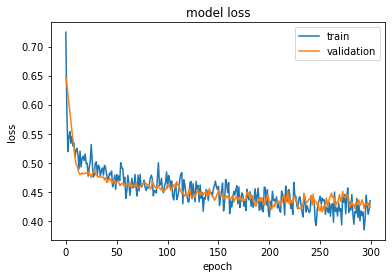

In [32]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [36]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256-164-8)

# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(164, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, 
                    batch_size=32, #Batch Size = 32
                    verbose=1, 
                    validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
21/21 [==============================] - 2s 16ms/step - loss: 0.7367 - accuracy: 0.6277 - val_loss: 0.6528 - val_accuracy: 0.6955
Epoch 2/300
21/21 [==============================] - 0s 4ms/step - loss: 0.5812 - accuracy: 0.7280 - val_loss: 0.6334 - val_accuracy: 0.6682
Epoch 3/300
21/21 [==============================] - 0s 4ms/step - loss: 0.5212 - accuracy: 0.7416 - val_loss: 0.6244 - val_accuracy: 0.6773
Epoch 4/300
21/21 [==============================] - 0s 4ms/step - loss: 0.5428 - accuracy: 0.7219 - val_loss: 0.6225 - val_accuracy: 0.6773
Epoch 5/300
21/21 [==============================] - 0s 4ms/step - loss: 0.5659 - accuracy: 0.7280 - val_loss: 0.6177 - val_accuracy: 0.6909
Epoch 6/300
21/21 [==============================] - 0s 4ms/step - loss: 0.5425 - accuracy: 0.7173 - val_loss: 0.6095 - val_accuracy: 0.7045
Epoch 7/300
21/21 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.7553 - val_loss: 0.6017 - val_accuracy: 0.7000
Epoch 8/300


Epoch 59/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.8040 - val_loss: 0.4556 - val_accuracy: 0.7864
Epoch 60/300
21/21 [==============================] - 0s 5ms/step - loss: 0.4300 - accuracy: 0.8116 - val_loss: 0.4555 - val_accuracy: 0.7727
Epoch 61/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4541 - accuracy: 0.8267 - val_loss: 0.4558 - val_accuracy: 0.7727
Epoch 62/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4405 - accuracy: 0.8237 - val_loss: 0.4503 - val_accuracy: 0.7818
Epoch 63/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.8313 - val_loss: 0.4610 - val_accuracy: 0.7682
Epoch 64/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4623 - accuracy: 0.8070 - val_loss: 0.4601 - val_accuracy: 0.7727
Epoch 65/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4243 - accuracy: 0.8116 - val_loss: 0.4552 - val_accuracy: 0.7636
Epoch 

21/21 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.8146 - val_loss: 0.4293 - val_accuracy: 0.7909
Epoch 174/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4150 - accuracy: 0.8191 - val_loss: 0.4420 - val_accuracy: 0.7864
Epoch 175/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3958 - accuracy: 0.8389 - val_loss: 0.4381 - val_accuracy: 0.7909
Epoch 176/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4160 - accuracy: 0.8313 - val_loss: 0.4301 - val_accuracy: 0.7818
Epoch 177/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3996 - accuracy: 0.8404 - val_loss: 0.4305 - val_accuracy: 0.7773
Epoch 178/300
21/21 [==============================] - 0s 5ms/step - loss: 0.3862 - accuracy: 0.8359 - val_loss: 0.4308 - val_accuracy: 0.7818
Epoch 179/300
21/21 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.8237 - val_loss: 0.4342 - val_accuracy: 0.7864
Epoch 180/300

21/21 [==============================] - 0s 4ms/step - loss: 0.3975 - accuracy: 0.8450 - val_loss: 0.4310 - val_accuracy: 0.8227
Epoch 288/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3558 - accuracy: 0.8495 - val_loss: 0.4287 - val_accuracy: 0.8000
Epoch 289/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3532 - accuracy: 0.8541 - val_loss: 0.4283 - val_accuracy: 0.8091
Epoch 290/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8419 - val_loss: 0.4268 - val_accuracy: 0.8136
Epoch 291/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3702 - accuracy: 0.8450 - val_loss: 0.4305 - val_accuracy: 0.8091
Epoch 292/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.8511 - val_loss: 0.4295 - val_accuracy: 0.8045
Epoch 293/300
21/21 [==============================] - 0s 4ms/step - loss: 0.3797 - accuracy: 0.8359 - val_loss: 0.4187 - val_accuracy: 0.8136
Epoch 294/300

In [37]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.2681 - accuracy: 0.9027
Training Accuracy: 90.27
7/7 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8227
Validation Accuracy: 82.27


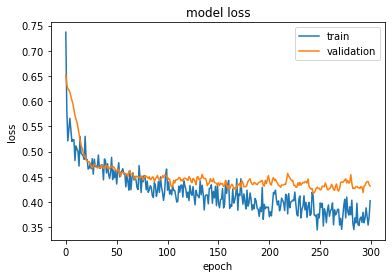

In [38]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256-164-8)

# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(164, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, 
                    batch_size=64, #Batch Size = 64
                    verbose=1, 
                    validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
11/11 [==============================] - 2s 35ms/step - loss: 0.7526 - accuracy: 0.6170 - val_loss: 0.6573 - val_accuracy: 0.7318
Epoch 2/300
11/11 [==============================] - 0s 6ms/step - loss: 0.6040 - accuracy: 0.7188 - val_loss: 0.6381 - val_accuracy: 0.7045
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 0.5717 - accuracy: 0.7295 - val_loss: 0.6274 - val_accuracy: 0.7045
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 0.5441 - accuracy: 0.7295 - val_loss: 0.6231 - val_accuracy: 0.6955
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: 0.5627 - accuracy: 0.7310 - val_loss: 0.6201 - val_accuracy: 0.6955
Epoch 6/300
11/11 [==============================] - 0s 6ms/step - loss: 0.5426 - accuracy: 0.7325 - val_loss: 0.6187 - val_accuracy: 0.6909
Epoch 7/300
11/11 [==============================] - 0s 6ms/step - loss: 0.5315 - accuracy: 0.7477 - val_loss: 0.6156 - val_accuracy: 0.6909
Epoch 8/300


Epoch 59/300
11/11 [==============================] - 0s 8ms/step - loss: 0.4634 - accuracy: 0.7903 - val_loss: 0.4610 - val_accuracy: 0.7773
Epoch 60/300
11/11 [==============================] - 0s 7ms/step - loss: 0.4416 - accuracy: 0.8116 - val_loss: 0.4639 - val_accuracy: 0.7682
Epoch 61/300
11/11 [==============================] - 0s 6ms/step - loss: 0.4510 - accuracy: 0.7979 - val_loss: 0.4626 - val_accuracy: 0.7773
Epoch 62/300
11/11 [==============================] - 0s 6ms/step - loss: 0.4596 - accuracy: 0.8085 - val_loss: 0.4634 - val_accuracy: 0.7773
Epoch 63/300
11/11 [==============================] - 0s 7ms/step - loss: 0.4329 - accuracy: 0.8176 - val_loss: 0.4680 - val_accuracy: 0.7818
Epoch 64/300
11/11 [==============================] - 0s 7ms/step - loss: 0.4517 - accuracy: 0.8222 - val_loss: 0.4673 - val_accuracy: 0.7727
Epoch 65/300
11/11 [==============================] - 0s 6ms/step - loss: 0.4361 - accuracy: 0.8055 - val_loss: 0.4645 - val_accuracy: 0.7773
Epoch 

11/11 [==============================] - 0s 6ms/step - loss: 0.4163 - accuracy: 0.8237 - val_loss: 0.4373 - val_accuracy: 0.7773
Epoch 174/300
11/11 [==============================] - 0s 7ms/step - loss: 0.4155 - accuracy: 0.8252 - val_loss: 0.4377 - val_accuracy: 0.7591
Epoch 175/300
11/11 [==============================] - 0s 6ms/step - loss: 0.3789 - accuracy: 0.8435 - val_loss: 0.4371 - val_accuracy: 0.7636
Epoch 176/300
11/11 [==============================] - 0s 7ms/step - loss: 0.4036 - accuracy: 0.8267 - val_loss: 0.4350 - val_accuracy: 0.7727
Epoch 177/300
11/11 [==============================] - 0s 6ms/step - loss: 0.3896 - accuracy: 0.8267 - val_loss: 0.4312 - val_accuracy: 0.7773
Epoch 178/300
11/11 [==============================] - 0s 6ms/step - loss: 0.4084 - accuracy: 0.8222 - val_loss: 0.4321 - val_accuracy: 0.7818
Epoch 179/300
11/11 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8252 - val_loss: 0.4452 - val_accuracy: 0.7773
Epoch 180/300

11/11 [==============================] - 0s 6ms/step - loss: 0.3850 - accuracy: 0.8511 - val_loss: 0.4306 - val_accuracy: 0.7864
Epoch 288/300
11/11 [==============================] - 0s 6ms/step - loss: 0.3920 - accuracy: 0.8328 - val_loss: 0.4337 - val_accuracy: 0.7864
Epoch 289/300
11/11 [==============================] - 0s 6ms/step - loss: 0.3702 - accuracy: 0.8556 - val_loss: 0.4295 - val_accuracy: 0.7955
Epoch 290/300
11/11 [==============================] - 0s 7ms/step - loss: 0.3649 - accuracy: 0.8556 - val_loss: 0.4259 - val_accuracy: 0.8091
Epoch 291/300
11/11 [==============================] - 0s 7ms/step - loss: 0.3806 - accuracy: 0.8450 - val_loss: 0.4234 - val_accuracy: 0.8227
Epoch 292/300
11/11 [==============================] - 0s 7ms/step - loss: 0.3704 - accuracy: 0.8419 - val_loss: 0.4227 - val_accuracy: 0.7955
Epoch 293/300
11/11 [==============================] - 0s 7ms/step - loss: 0.3743 - accuracy: 0.8252 - val_loss: 0.4366 - val_accuracy: 0.7818
Epoch 294/300

In [16]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8936
Training Accuracy: 89.36
7/7 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8000
Validation Accuracy: 80.00


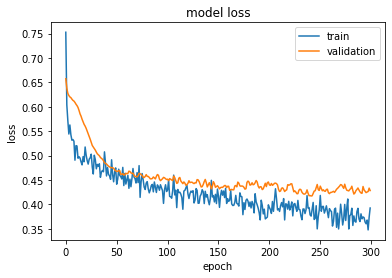

In [17]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
# fixate random seed to reproduce the same sequence
seed = 7
tf.random.set_seed(seed)
# 2 hidden layers, #Increase Dropout and BatchNomarlisation layers
# Powers of 2, Larger decrements (256-164-8)

# define the keras model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model = Sequential()

model.add(Dense(256, input_dim=4, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(164, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu', kernel_constraint=MaxNorm(1.0)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
# fit the keras model on the dataset
history = model.fit(scaled_X_train, y_train, epochs=300, 
                    batch_size=128, #Batch Size = 128
                    verbose=1, 
                    validation_data= (scaled_X_test, y_test))
history

#model description
model.summary()

Epoch 1/300
6/6 [==============================] - 2s 58ms/step - loss: 0.8079 - accuracy: 0.5912 - val_loss: 0.6654 - val_accuracy: 0.7318
Epoch 2/300
6/6 [==============================] - 0s 10ms/step - loss: 0.6044 - accuracy: 0.6960 - val_loss: 0.6484 - val_accuracy: 0.7318
Epoch 3/300
6/6 [==============================] - 0s 10ms/step - loss: 0.5884 - accuracy: 0.7204 - val_loss: 0.6377 - val_accuracy: 0.7318
Epoch 4/300
6/6 [==============================] - 0s 9ms/step - loss: 0.5631 - accuracy: 0.7204 - val_loss: 0.6305 - val_accuracy: 0.6955
Epoch 5/300
6/6 [==============================] - 0s 10ms/step - loss: 0.5658 - accuracy: 0.7310 - val_loss: 0.6262 - val_accuracy: 0.6955
Epoch 6/300
6/6 [==============================] - 0s 10ms/step - loss: 0.5528 - accuracy: 0.7158 - val_loss: 0.6242 - val_accuracy: 0.6909
Epoch 7/300
6/6 [==============================] - 0s 11ms/step - loss: 0.5319 - accuracy: 0.7310 - val_loss: 0.6222 - val_accuracy: 0.6955
Epoch 8/300
6/6 [====

6/6 [==============================] - 0s 10ms/step - loss: 0.4256 - accuracy: 0.8024 - val_loss: 0.4585 - val_accuracy: 0.7636
Epoch 118/300
6/6 [==============================] - 0s 11ms/step - loss: 0.4558 - accuracy: 0.8161 - val_loss: 0.4568 - val_accuracy: 0.7727
Epoch 119/300
6/6 [==============================] - 0s 10ms/step - loss: 0.4266 - accuracy: 0.8100 - val_loss: 0.4543 - val_accuracy: 0.7727
Epoch 120/300
6/6 [==============================] - 0s 10ms/step - loss: 0.4683 - accuracy: 0.7888 - val_loss: 0.4532 - val_accuracy: 0.7773
Epoch 121/300
6/6 [==============================] - 0s 11ms/step - loss: 0.4363 - accuracy: 0.8100 - val_loss: 0.4552 - val_accuracy: 0.7773
Epoch 122/300
6/6 [==============================] - 0s 10ms/step - loss: 0.4377 - accuracy: 0.8116 - val_loss: 0.4569 - val_accuracy: 0.7773
Epoch 123/300
6/6 [==============================] - 0s 9ms/step - loss: 0.4299 - accuracy: 0.8146 - val_loss: 0.4569 - val_accuracy: 0.7818
Epoch 124/300
6/6 [==

Epoch 175/300
6/6 [==============================] - 0s 10ms/step - loss: 0.4055 - accuracy: 0.8298 - val_loss: 0.4554 - val_accuracy: 0.7682
Epoch 176/300
6/6 [==============================] - 0s 8ms/step - loss: 0.4243 - accuracy: 0.8207 - val_loss: 0.4544 - val_accuracy: 0.7636
Epoch 177/300
6/6 [==============================] - 0s 9ms/step - loss: 0.4203 - accuracy: 0.8085 - val_loss: 0.4517 - val_accuracy: 0.7682
Epoch 178/300
6/6 [==============================] - 0s 9ms/step - loss: 0.4019 - accuracy: 0.8222 - val_loss: 0.4482 - val_accuracy: 0.7773
Epoch 179/300
6/6 [==============================] - 0s 10ms/step - loss: 0.4189 - accuracy: 0.8116 - val_loss: 0.4477 - val_accuracy: 0.7773
Epoch 180/300
6/6 [==============================] - 0s 9ms/step - loss: 0.3933 - accuracy: 0.8313 - val_loss: 0.4509 - val_accuracy: 0.7727
Epoch 181/300
6/6 [==============================] - 0s 8ms/step - loss: 0.4333 - accuracy: 0.8298 - val_loss: 0.4530 - val_accuracy: 0.7727
Epoch 182/3

Epoch 233/300
6/6 [==============================] - 0s 11ms/step - loss: 0.4040 - accuracy: 0.8359 - val_loss: 0.4450 - val_accuracy: 0.7773
Epoch 234/300
6/6 [==============================] - 0s 11ms/step - loss: 0.4015 - accuracy: 0.8237 - val_loss: 0.4447 - val_accuracy: 0.7682
Epoch 235/300
6/6 [==============================] - 0s 9ms/step - loss: 0.4157 - accuracy: 0.8176 - val_loss: 0.4417 - val_accuracy: 0.7727
Epoch 236/300
6/6 [==============================] - 0s 10ms/step - loss: 0.4104 - accuracy: 0.8267 - val_loss: 0.4395 - val_accuracy: 0.7682
Epoch 237/300
6/6 [==============================] - 0s 10ms/step - loss: 0.4303 - accuracy: 0.8207 - val_loss: 0.4394 - val_accuracy: 0.7591
Epoch 238/300
6/6 [==============================] - 0s 10ms/step - loss: 0.3999 - accuracy: 0.8359 - val_loss: 0.4400 - val_accuracy: 0.7773
Epoch 239/300
6/6 [==============================] - 0s 9ms/step - loss: 0.4053 - accuracy: 0.8298 - val_loss: 0.4398 - val_accuracy: 0.7773
Epoch 24

Epoch 291/300
6/6 [==============================] - 0s 9ms/step - loss: 0.3990 - accuracy: 0.8404 - val_loss: 0.4370 - val_accuracy: 0.7864
Epoch 292/300
6/6 [==============================] - 0s 9ms/step - loss: 0.3968 - accuracy: 0.8237 - val_loss: 0.4346 - val_accuracy: 0.7909
Epoch 293/300
6/6 [==============================] - 0s 9ms/step - loss: 0.4056 - accuracy: 0.8283 - val_loss: 0.4365 - val_accuracy: 0.7727
Epoch 294/300
6/6 [==============================] - 0s 9ms/step - loss: 0.3929 - accuracy: 0.8343 - val_loss: 0.4401 - val_accuracy: 0.7773
Epoch 295/300
6/6 [==============================] - 0s 8ms/step - loss: 0.3853 - accuracy: 0.8495 - val_loss: 0.4406 - val_accuracy: 0.7773
Epoch 296/300
6/6 [==============================] - 0s 10ms/step - loss: 0.3913 - accuracy: 0.8343 - val_loss: 0.4395 - val_accuracy: 0.7727
Epoch 297/300
6/6 [==============================] - 0s 10ms/step - loss: 0.3953 - accuracy: 0.8404 - val_loss: 0.4385 - val_accuracy: 0.7636
Epoch 298/3

In [19]:
# evaluate the keras model
_, accuracy = model.evaluate(scaled_X_train, y_train)
training_accuracy = accuracy*100
print('Training Accuracy: %.2f' % (training_accuracy))

_, accuracy = model.evaluate(scaled_X_test, y_test)
validation_accuracy = accuracy*100
print('Validation Accuracy: %.2f' % (validation_accuracy))

21/21 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.8663
Training Accuracy: 86.63
7/7 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7955
Validation Accuracy: 79.55


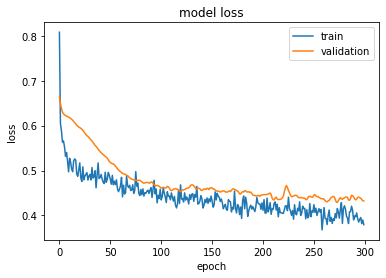

In [20]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()